### Generating Random Variables

In [2]:
from __future__ import print_function, division

import numpy as np

import scipy.stats

import matplotlib.pyplot as pyplot

from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

# seed the random number generator so we all get the same results
np.random.seed(17)

# some nice colors from http://colorbrewer2.org/
COLOR1 = '#7fc97f'
COLOR2 = '#beaed4'
COLOR3 = '#fdc086'
COLOR4 = '#ffff99'
COLOR5 = '#386cb0'

%matplotlib inline

In [8]:
mu1, sig1 = 178, 7.7
male_height_dist = scipy.stats.norm(mu1, sig1)

In [9]:
mu2, sig2 = 163, 7.3
female_height_dist = scipy.stats.norm(mu2, sig2)

In [12]:
male_height_dist.mean()

178.0

In [13]:
male_height_dist.std()

7.7

### CDF

CDF stands for a cumulative distribution function.  It tells us the likelihood that a value is this amount or less.  

For example, let's look at it with our normal distribution.

In [52]:
import scipy.stats as stats

In [53]:
std_normal = stats.norm(0, 1)

> Above we initalized a standard normal distribution with a mean of 0 and standard deviation of 1.

This means that our distribution is centered around the mean, and on average, a datapoint is a value of 1 away from this mean.  Now let's see what the cdf is of a couple values.

In [54]:
norm.cdf(0)

0.5

Zero is our midpoint.  So this is saying that the likelihood of a value lower than 0 is .5.  What a value lower that -1.

In [55]:
norm.cdf(-1)

0.15865525393145707

The likelihood of drawing a number lower than -1, is only `.158`.  And what about the likelihood of a number 1 or lower?

In [56]:
norm.cdf(1)

0.8413447460685429

Well, with a standard normal distribution this happens with a likelihood of .84.

### Using Percentiles

Now let's imagine that we want get a sense of different percentiles.  

* For example, what number is higher than 99 percent of numbers drawn from our distribution?

In [57]:
norm.ppf(.99)

2.3263478740408408

That number is 2.32.

What number is greater than `.8413` of the numbers drawn from our population?

Well, we already saw this number above.

In [60]:
norm.ppf(.8413)

0.9998150936147446

That number is 1.

So the percent point function is the *inverse* of the cdf.

* With the cdf we provide a number, and the cdf tells us the likelihood of drawing a number less than that number.  

In [61]:
norm.cdf(2)

0.9772498680518208

And ppf gives us the corresponding number that at that likelihood.

In [62]:
norm.ppf(0.9772498680518208)

2.0000000000000004

### Try to add up to one

Now let's use this knowledge to try to plot a distribution.

In [93]:
percentiles = np.linspace(.01, .99, 99)

In [94]:
percentiles[:3]

array([0.01, 0.02, 0.03])

In [101]:
xs = norm.ppf(percentiles)
xs[:4]

array([-2.32634787, -2.05374891, -1.88079361, -1.75068607])

In [103]:
ys = norm.pdf(nums)
ys[:4]

array([0.02665214, 0.04841814, 0.06804195, 0.08617377])

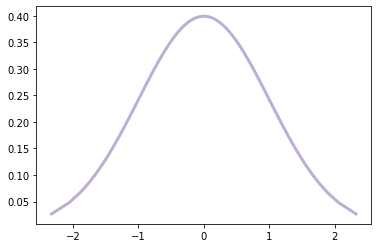

In [105]:
pyplot.plot(xs, ys, label='standard normal', linewidth=3, color=COLOR2)

In [107]:
def pdf_nums(rv):
    mean, std = rv.mean(), rv.std()
    percentiles = np.linspace(.01, .99, 99)
    xs = norm.ppf(percentiles)
    ys = rv.pdf(xs)
    return xs, ys

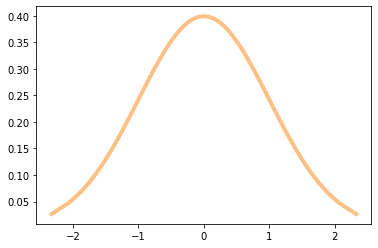

In [110]:
pyplot.plot(*pdf_nums(norm), label='female', linewidth=4, color=COLOR3)

Here's what the two distributions look like.

Let's assume for now that those are the true distributions for the population.

I'll use `rvs` to generate random samples from the population distributions.  Note that these are totally random, totally representative samples, with no measurement error!

[Normal random variable](https://www.tutorialspoint.com/scipy/scipy_stats.htm)